<IPython.core.display.Javascript object>


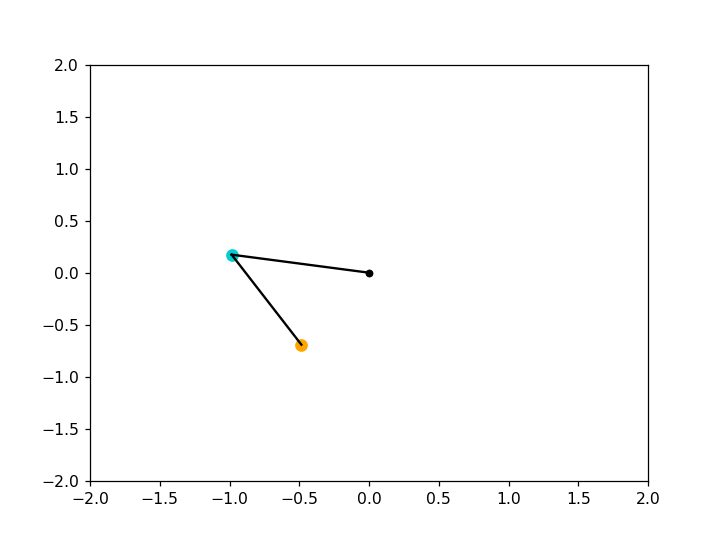

In [2]:
%matplotlib notebook
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

#constants in kg and m
g = 9.8
m1 = 10
m2 = 10
L1 = 1
L2 = 1
L = L1 + L2

#initial conditions: [theta1, omega1, theta2, omega2]
y0 = np.radians([-100, 0, 30, 0]) 

#start and stop times in seconds
t = [0,10]

def f(t, y):
    
    theta1 = y[0]
    omega1 = y[1]
    theta2 = y[2]
    omega2 = y[3]

    dtdt1 = omega1   
    dwdt1 = (-g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2 * theta2) - 2 * np.sin(theta1 - theta2) * m2 * (omega2**2 * L2 + omega1**2 * L1 * np.cos(theta1 - theta2))) / (L1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))
    dtdt2 = omega2   
    dwdt2 = (2 * np.sin(theta1 - theta2) * (omega1**2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1) + omega2**2 * L2 * m2 * np.cos(theta1 - theta2))) / (L2 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))    
    return [dtdt1,dwdt1,dtdt2,dwdt2]

sol = integrate.solve_ivp(f, t, y0, t_eval = np.linspace(t[0],t[1],t[1] * 50))

y0 = sol.y[0]
y1 = sol.y[1]
y2 = sol.y[2]
y3 = sol.y[3]

# find the x and y coordinates of m1 and m2
x1 = L1 * np.sin(y0);
y1 = - L1 * np.cos(y0);

x2 = x1 + L2 * np.sin(y2);
y2 = y1 - L2 * np.cos(y2);

#create plot
fig, ax = plt.subplots()
path1, = ax.plot([],[], '.', color='darkturquoise', markersize=4, alpha=0.3)
dot1, = ax.plot([],[], 'o', color='darkturquoise',markersize = 4 * np.sqrt(np.sqrt(m1)))
rod1, = ax.plot([],[], 'k-')

path2, = ax.plot([],[], '.', color='orange', markersize=4, alpha=0.3)
dot2, = ax.plot([],[], 'o', color='orange', markersize = 4 * np.sqrt(np.sqrt(m2)))
rod2, = ax.plot([],[], 'k-')

ax.plot(0,0,'ko', markersize=4)

plt.xlim(-L,L)
plt.ylim(-L,L)

#animate graph
def animate(i):
    
    if i < 50:
        path1.set_data(x1[:i], y1[:i])
        dot1.set_data(x1[i], y1[i])
        rod1.set_data([0,x1[i]], [0,y1[i]])

        path2.set_data(x2[:i], y2[:i])
        dot2.set_data(x2[i], y2[i])
        rod2.set_data([x1[i],x2[i]], [y1[i],y2[i]])
    else:
        path1.set_data(x1[i-50:i], y1[i-50:i])
        dot1.set_data(x1[i], y1[i])
        rod1.set_data([0,x1[i]], [0,y1[i]])

        path2.set_data(x2[i-50:i], y2[i-50:i])
        dot2.set_data(x2[i], y2[i])
        rod2.set_data([x1[i],x2[i]], [y1[i],y2[i]])
    
    return path1, dot1, rod1, path2, dot2, rod2

anim = FuncAnimation(fig,
                     animate,
                     frames = t[1] * 50,
                     interval = 1,
                     blit = True)
plt.show()